In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('../data/train.csv')
df.head()

,id,Name,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Yuvraj,Male,33,Visakhapatnam,Student,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3,1.0,No,1
1,8,Aishwarya,Female,24,Bangalore,Student,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3,2.0,Yes,0
2,26,Aditya,Male,31,Srinagar,Student,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9,1.0,Yes,0
3,30,Prisha,Female,28,Varanasi,Student,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4,5.0,Yes,1
4,32,Chhavi,Female,25,Jaipur,Student,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1,1.0,No,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Name                                   27901 non-null  object 
 2   Gender                                 27901 non-null  object 
 3   Age                                    27901 non-null  int64  
 4   City                                   27901 non-null  object 
 5   Profession                             27901 non-null  object 
 6   Academic Pressure                      27892 non-null  float64
 7   CGPA                                   27892 non-null  float64
 8   Study Satisfaction                     27891 non-null  float64
 9   Sleep Duration                         27901 non-null  object 
 10  Dietary Habits                         27899 non-null  object 
 11  De

In [42]:
df.describe()

,id,Age,Academic Pressure,CGPA,Study Satisfaction,Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27892.000000,27892.000000,27891.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.142227,7.658575,2.944893,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.380535,1.464499,1.360250,3.707642,1.437347,0.492645
min,2.000000,18.000000,1.000000,5.030000,1.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,6.290000,2.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,7.770000,3.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,8.920000,4.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,10.000000,5.000000,12.000000,5.000000,1.000000


In [43]:
df.isnull().sum()

id                                        0
Name                                      0
Gender                                    0
Age                                       0
City                                      0
Profession                                0
Academic Pressure                         9
CGPA                                      9
Study Satisfaction                       10
Sleep Duration                            0
Dietary Habits                            2
Degree                                    0
Have you ever had suicidal thoughts ?     0
Study Hours                               0
Financial Stress                          3
Family History of Mental Illness          0
Depression                                0
dtype: int64

In [3]:
df.dropna(subset=['Academic Pressure','CGPA','Study Satisfaction','Dietary Habits','Financial Stress'], inplace=True)

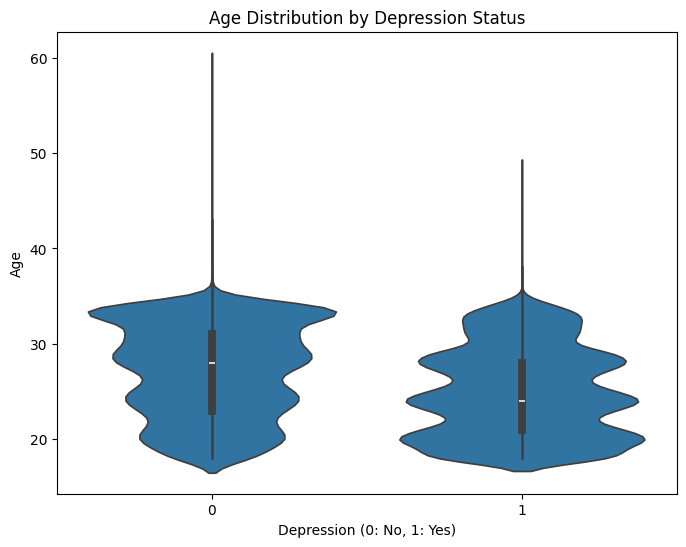

In [45]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Depression', y='Age')
plt.title('Age Distribution by Depression Status')
plt.xlabel('Depression (0: No, 1: Yes)')
plt.ylabel('Age')
plt.show()

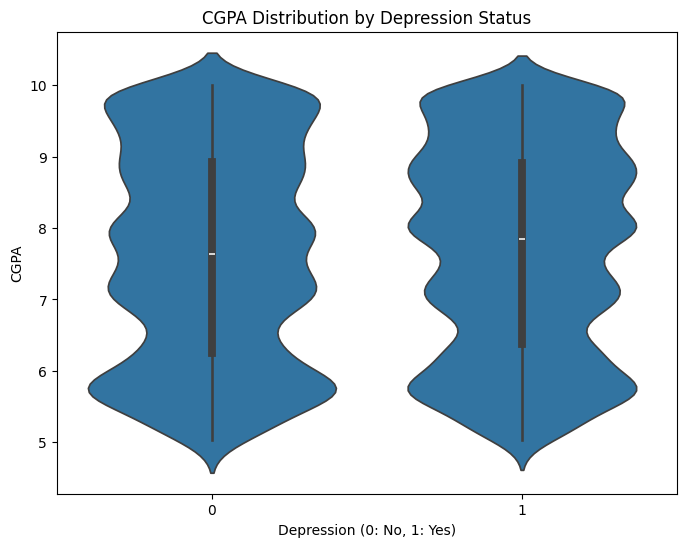

In [11]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Depression', y='CGPA')
plt.title('CGPA Distribution by Depression Status')
plt.xlabel('Depression (0: No, 1: Yes)')
plt.ylabel('CGPA')
plt.show()

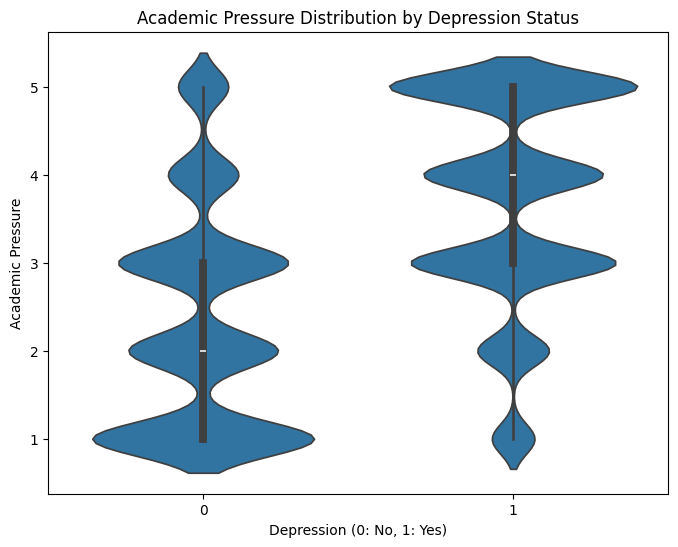

In [47]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Depression', y='Academic Pressure')
plt.title('Academic Pressure Distribution by Depression Status')
plt.xlabel('Depression (0: No, 1: Yes)')
plt.ylabel('Academic Pressure')
plt.show()

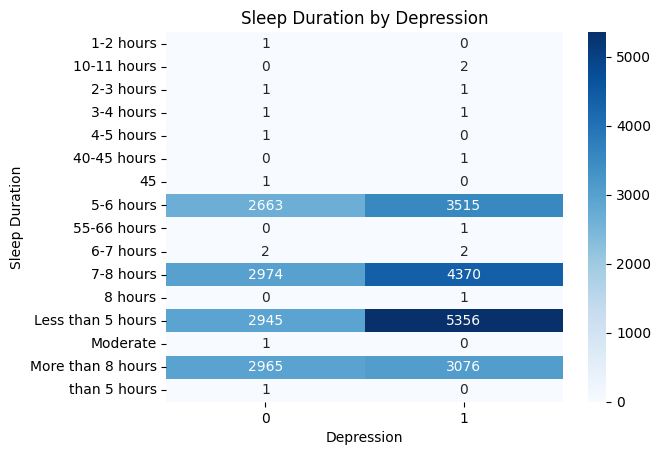

In [48]:
cross_tab = pd.crosstab(df['Sleep Duration'], df['Depression'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('Sleep Duration by Depression')
plt.show()

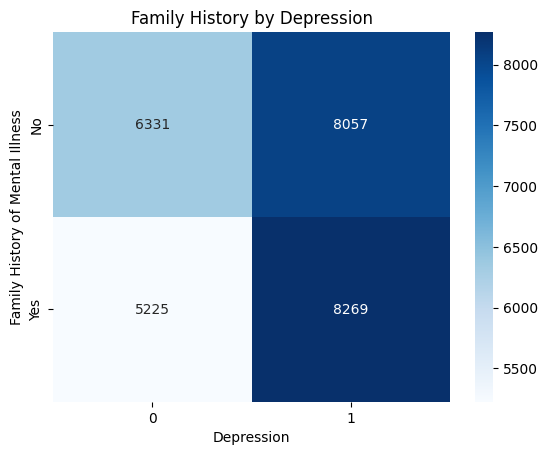

In [49]:
cross_tab = pd.crosstab(df['Family History of Mental Illness'], df['Depression'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('Family History by Depression')
plt.show()

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27882 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27882 non-null  int64  
 1   Name                                   27882 non-null  object 
 2   Gender                                 27882 non-null  object 
 3   Age                                    27882 non-null  int64  
 4   City                                   27882 non-null  object 
 5   Profession                             27882 non-null  object 
 6   Academic Pressure                      27882 non-null  float64
 7   CGPA                                   27882 non-null  float64
 8   Study Satisfaction                     27882 non-null  float64
 9   Sleep Duration                         27882 non-null  object 
 10  Dietary Habits                         27882 non-null  object 
 11  Degree 

In [51]:
df.groupby("Depression")["CGPA"].describe()

,count,mean,std,min,25%,50%,75%,max
Depression,,,,,,,,
0,11556.0,7.620897,1.484022,5.03,6.25,7.64,8.93,10.0
1,16326.0,7.685737,1.449876,5.03,6.37,7.85,8.91,10.0


In [52]:
df["Have you ever had suicidal thoughts ?"].value_counts()

Have you ever had suicidal thoughts ?
Yes    17645
No     10237
Name: count, dtype: int64

<Axes: xlabel='Have you ever had suicidal thoughts ?', ylabel='count'>

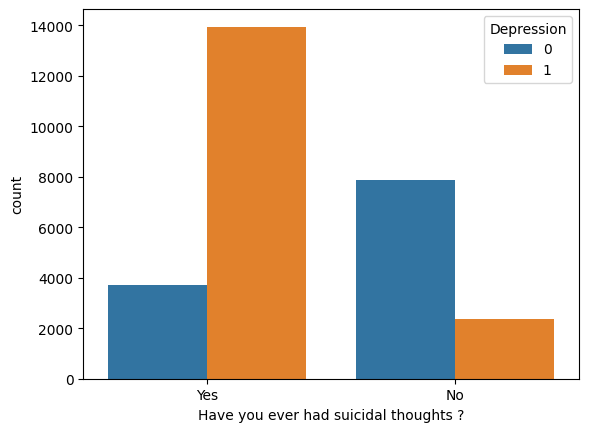

In [53]:
sns.countplot(x="Have you ever had suicidal thoughts ?", data=df,hue="Depression")

In [54]:
df.groupby("Have you ever had suicidal thoughts ?")["Depression"].value_counts(normalize=True)

Have you ever had suicidal thoughts ?  Depression
No                                     0             0.767803
                                       1             0.232197
Yes                                    1             0.790536
                                       0             0.209464
Name: proportion, dtype: float64

<Axes: xlabel='Financial Stress', ylabel='count'>

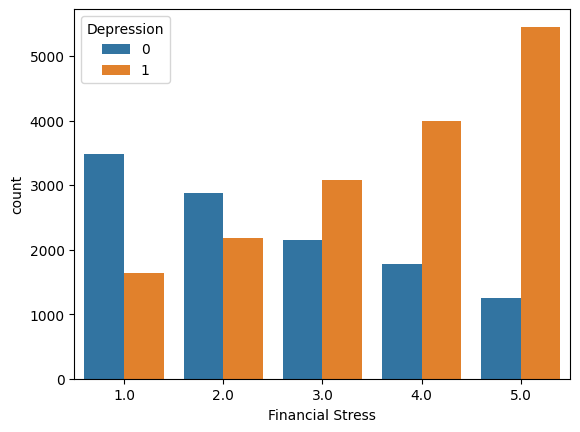

In [55]:
sns.countplot(x="Financial Stress", data=df,hue="Depression")

<Axes: xlabel='count', ylabel='Degree'>

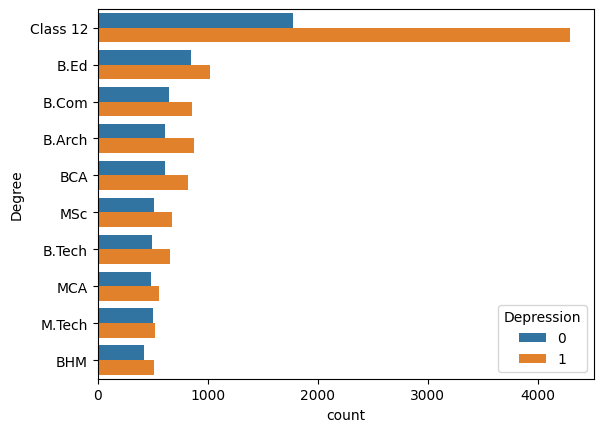

In [56]:
sns.countplot(data=df, y="Degree", hue="Depression", order=df["Degree"].value_counts().head(10).index)


In [57]:
df.select_dtypes('object').nunique()

Name                                     268
Gender                                     2
City                                      52
Profession                                14
Sleep Duration                            16
Dietary Habits                            13
Degree                                    61
Have you ever had suicidal thoughts ?      2
Family History of Mental Illness           2
dtype: int64

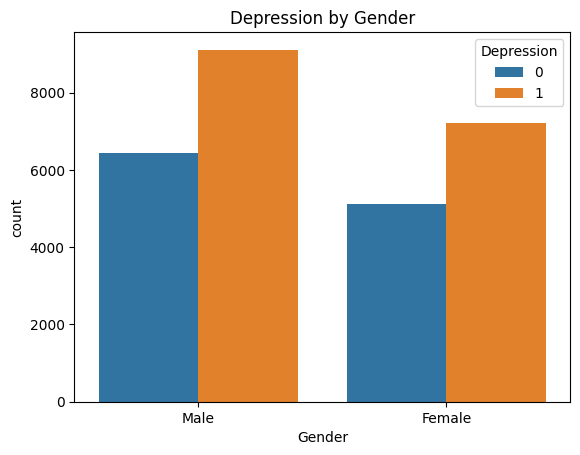

Gender  Depression
Female  1             0.584528
        0             0.415472
Male    1             0.586342
        0             0.413658
Name: proportion, dtype: float64

In [58]:
sns.countplot(data=df, x='Gender', hue='Depression')
plt.title('Depression by Gender')
plt.show()

df.groupby('Gender')['Depression'].value_counts(normalize=True)


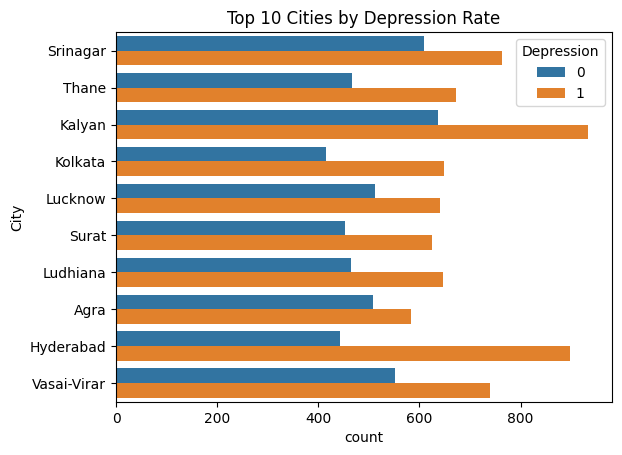

In [59]:
top_cities = df['City'].value_counts().head(10).index
sns.countplot(data=df[df['City'].isin(top_cities)], y='City', hue='Depression')
plt.title('Top 10 Cities by Depression Rate')
plt.show()

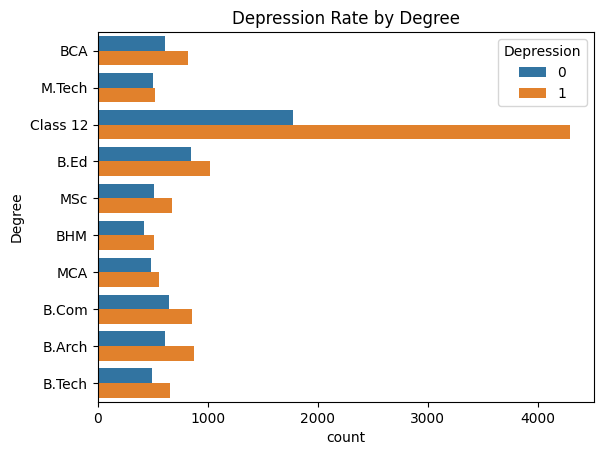

Degree
0           100.0
20          100.0
24          100.0
8.56        100.0
BPA         100.0
BPharm      100.0
Badhya      100.0
Bhopal      100.0
Brit        100.0
Class 11    100.0
Name: Depression, dtype: float64

In [60]:
degree_counts = df['Degree'].value_counts().head(10).index
sns.countplot(data=df[df['Degree'].isin(degree_counts)], y='Degree', hue='Depression')
plt.title('Depression Rate by Degree')
plt.show()

(df.groupby('Degree')['Depression'].mean()*100).sort_values(ascending=False).head(10)

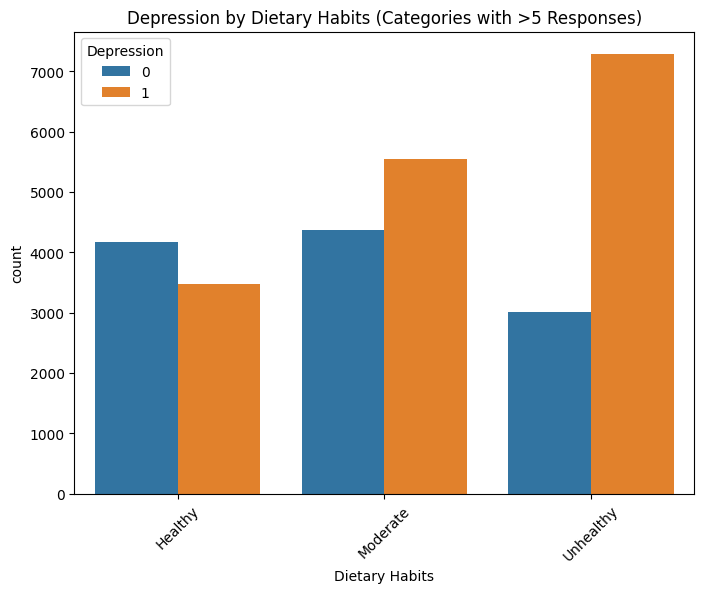

In [61]:
valid_habits = df['Dietary Habits'].value_counts()
valid_habits = valid_habits[valid_habits > 5].index

plt.figure(figsize=(8,6))
sns.countplot(
    data=df[df['Dietary Habits'].isin(valid_habits)],
    x='Dietary Habits',
    hue='Depression'
)
plt.title('Depression by Dietary Habits (Categories with >5 Responses)')
plt.xticks(rotation=45)
plt.show()

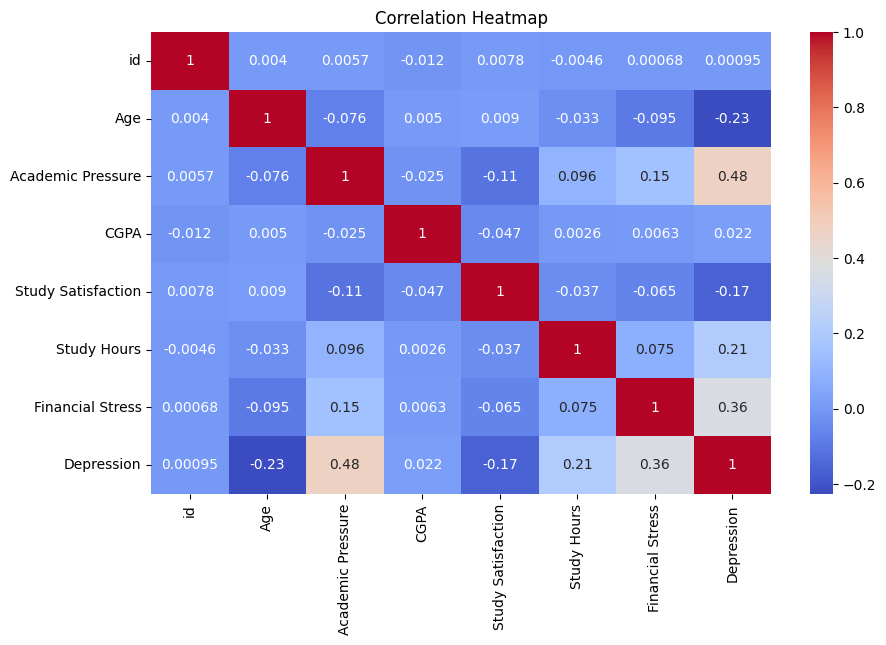

In [62]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

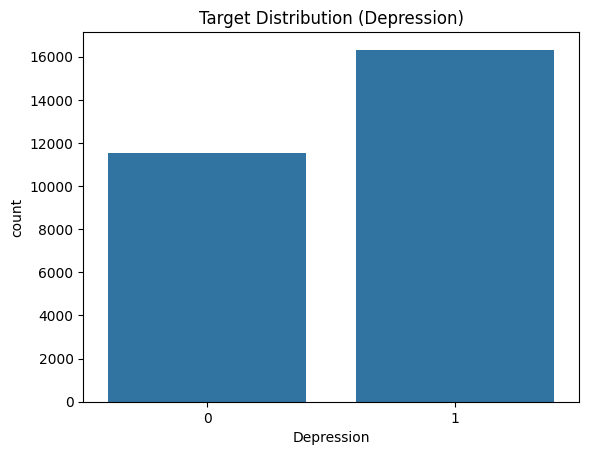

Depression
1    0.585539
0    0.414461
Name: proportion, dtype: float64

In [63]:
sns.countplot(x='Depression', data=df)
plt.title('Target Distribution (Depression)')
plt.show()

df['Depression'].value_counts(normalize=True)

In [64]:
df = df.drop(columns=['id', 'Name', 'Profession'])

In [65]:
from sklearn.preprocessing import LabelEncoder

label_enc_cols = [
    'Family History of Mental Illness',
    'Have you ever had suicidal thoughts ?'
]

le = LabelEncoder()
for col in label_enc_cols:
    df[col] = le.fit_transform(df[col])

In [66]:
X = df.drop('Depression', axis=1)
y = df['Depression']

In [77]:
df.to_csv("../data/clean_data.csv", index=False)